# Clipping

Experiment 2 is giving quite resonable results. But there is still a lot of noise on the border of an image because light condition is not perfect. Here I want to try clipping bad area.

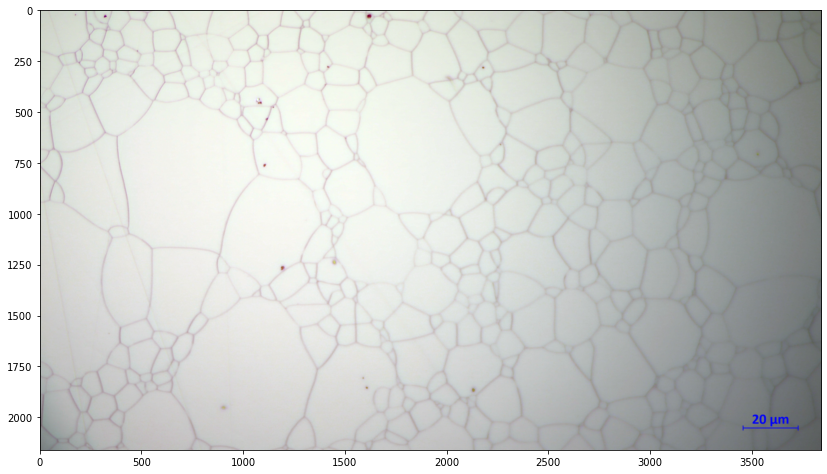

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 9]

img = cv2.imread('../example_data/Snap-05.jpg')
plt.imshow(img)
plt.show()

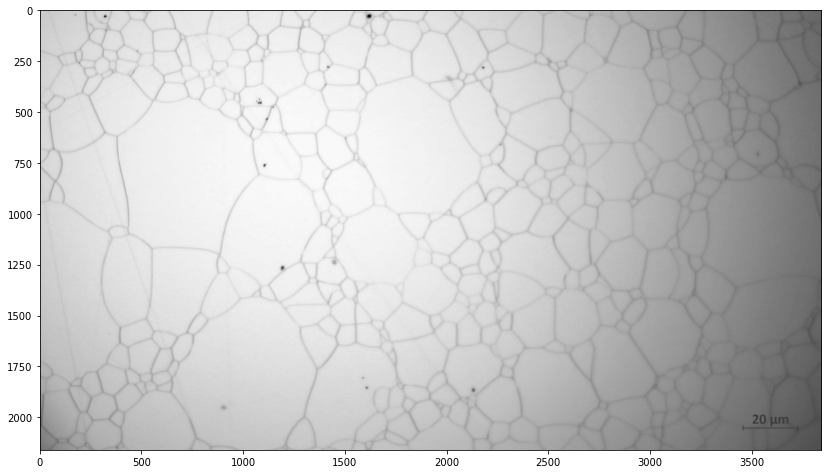

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

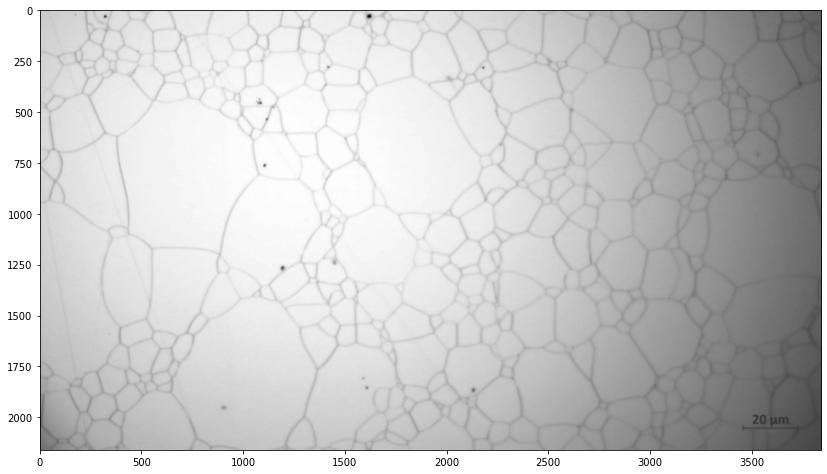

In [11]:
img_bl = cv2.blur(img_gray, (8, 8))
plt.imshow(img_bl, cmap='gray')
plt.show()

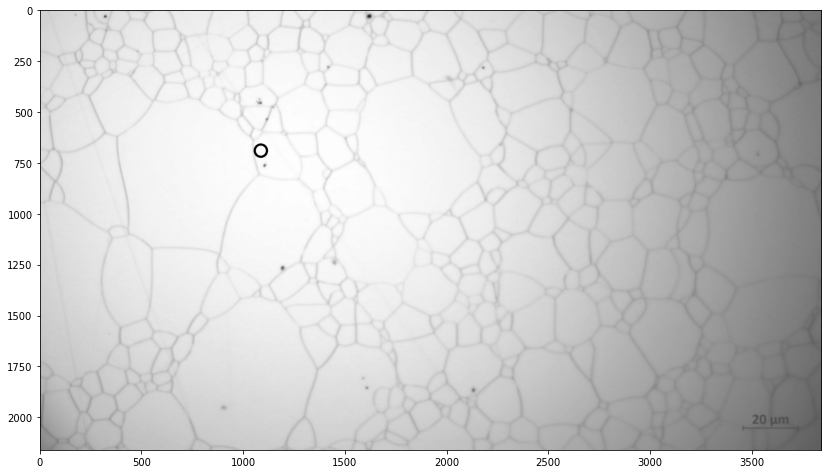

In [28]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img_bl)
img_circle = img_bl.copy()
cv2.circle(img_circle, maxLoc, 30, 0, 10)
plt.imshow(img_circle, cmap='gray')
plt.show()

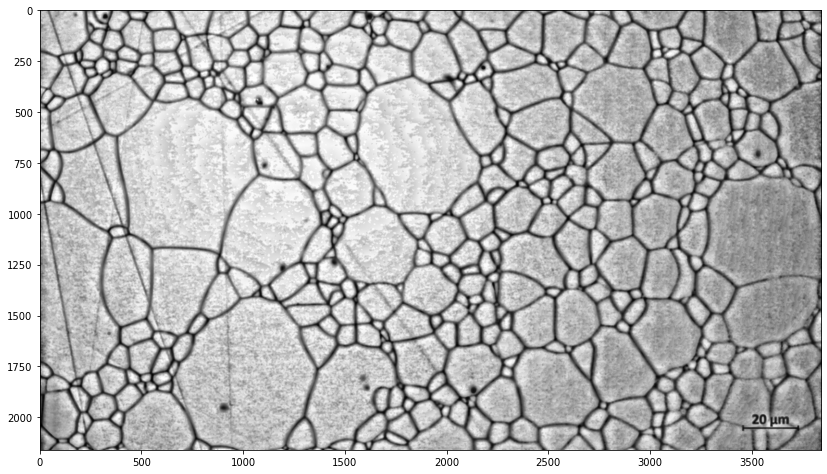

In [71]:
clahe = cv2.createCLAHE(clipLimit=25.0, tileGridSize=(64, 64))
img_cl = clahe.apply(img_bl)
plt.imshow(img_cl, cmap='gray')
plt.show()

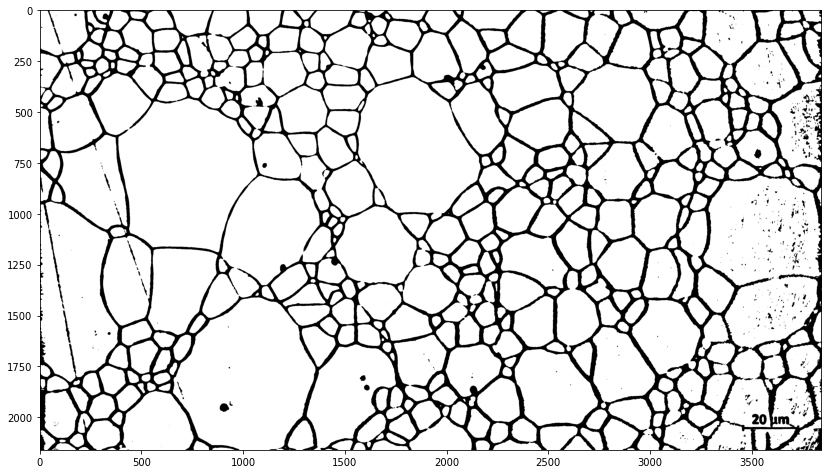

In [72]:
_, img_tr = cv2.threshold(img_cl, 0, 255, cv2.THRESH_TRIANGLE+cv2.THRESH_BINARY)
plt.imshow(img_tr, cmap='gray')
plt.show()

Clip image to remove noisy areas:

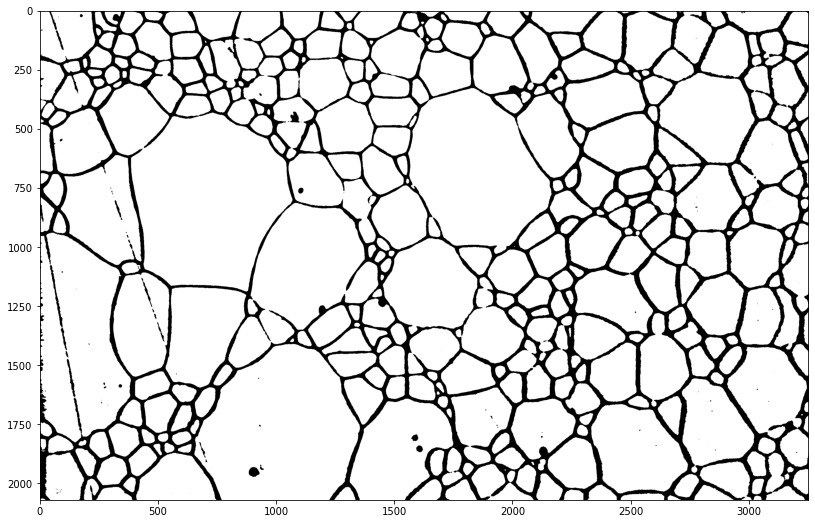

In [78]:
img_clip = img_tr[:int(3*maxLoc[1]), :int(3*maxLoc[0])]
plt.imshow(img_clip, cmap='gray')
plt.show()

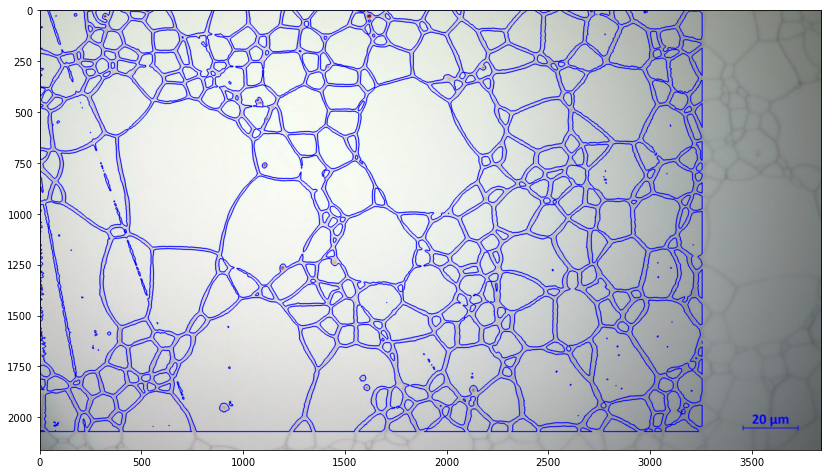

In [79]:
contours, hierarchy = cv2.findContours(img_clip, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
img_contours = cv2.drawContours(img_contours, contours, -1, (0,0,255), 3)
plt.imshow(img_contours)
plt.show()

Remove noise by thresholding contour length:

In [80]:
long_contours = [c for c in contours if len(c) > 10]
len(long_contours)

385

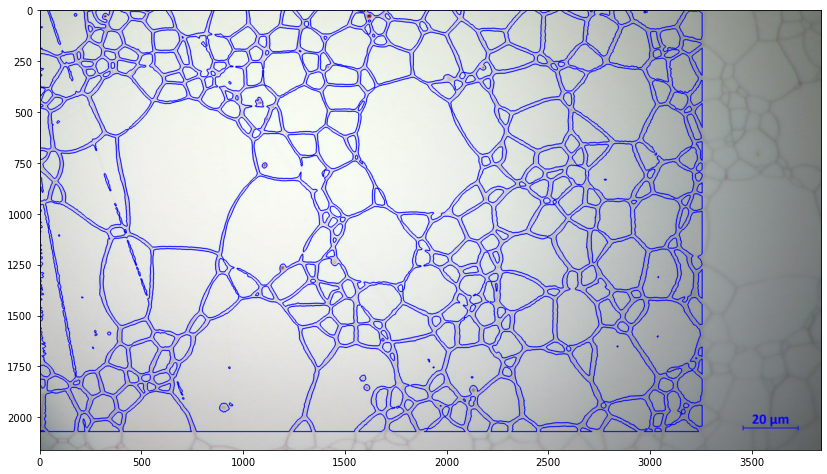

In [81]:
img_contours = img.copy()
img_contours = cv2.drawContours(img_contours, long_contours, -1, (0,0,255), 3)
plt.imshow(img_contours)
plt.show()